## Comparing Food Prices in Nigeria vs The Rest of Africa

### Introduction:
Food is one of the most important things to society. It is vital to providing nourishment to the people in a country as well as provide employement through a thriving agriculture sector and commercial sector.
In Africa in general, food is integral to how the economy operates, from government spending on food imports, to the budgets on agriculture and food production and to how food inflation affects the life of citizens in the continent.
The goal of this analysis is to compare the food market in Nigeria and the one in Africa as a whole and also to compare important commodities such as rice which is a staple in Nigeria and Petrol which has been one of the most important product in the Nigerian Retail Market.

The analysis can be broken down into 5 distinct questions:
* What market type is common in Africa and Nigeria.
* What are the top products in each of these markets.
* How has the price for these products change over time.
* How does the price of fuel and rice in Nigeria compare with the rest of the continent.
* How does the price of fuel and rice differ in different Nigerian states.

### Summary:
1. Africa has a very small produce market which was the Madagascar Rice paddy market.
2. The Nigerian Market like the African one was dominated by the retail market.
3. Prices seemed to be going down in the continent after 2020 while they went up in Nigeria.
4. The cost of petrol in Nigeria was significantly lower than that in the rest of the continent while the price of rice was fairly close to each other.

In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

In [3]:
# Creating Helper Functions for Data visualisations

def barh_plot(df: pd.DataFrame, colname: str,
              ylabel: str|None = None, title: str|None = None,
              perc: bool = False, top_n: int = None, ax=None) -> None:

    if not top_n:
        top_n = df[colname].value_counts().shape[0]

    if not ax:
        fig, ax = plt.subplots(figsize=(10, 6))

    ax.tick_params(bottom=0, left=0, top=0) 
    
    spines = ["top", "bottom", "right"]
    for spine in spines:
        ax.spines[spine].set_visible(False)

  
    ax.grid(axis="x", alpha=0.3)
            
    ax.get_xaxis().set_visible(False) 
  
    
    if perc:
        (df[colname].value_counts(normalize=perc).head(top_n).sort_values() * 100).plot.barh(ax= ax, color = "#004987", width=0.8)
        ax.bar_label(ax.containers[0], fmt=" {:0.2f}%", color="#004987")

    else:
        df[colname].value_counts().head(top_n).sort_values().plot.barh(ax= ax, color = "#004987", width=0.8)
        ax.bar_label(ax.containers[0], fmt=" {:,.0f}", color="#004987")
    
    if ylabel:
        ax.set_ylabel(ylabel)
        
    if title:
        ax.set_title(title)
    
    plt.show()


def line_plot() -> None:
    pass

## Data Exploration and Data Cleaning

In [4]:
food_prices = pd.read_csv("africa_food_prices.csv")

In [5]:
food_prices.head()

,Unnamed: 0,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,mp_commoditysource
0,15427,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0,NaN
1,15428,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0,NaN
2,15429,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0,NaN
3,15430,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0,NaN
4,15431,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0,NaN


The data contains the column `Unnamed: 0` which appears to be the previous index of the data before it was exported to a csv file. Therefore that column will be dropped as it is not important to our analysis.

In [6]:
food_prices.shape

(956779, 19)

In [7]:
food_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956779 entries, 0 to 956778
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          956779 non-null  int64  
 1   country_id          956779 non-null  float64
 2   country             956779 non-null  object 
 3   state_id            956779 non-null  int64  
 4   state               830101 non-null  object 
 5   market_id           956779 non-null  int64  
 6   market              956779 non-null  object 
 7   produce_id          956779 non-null  int64  
 8   produce             956779 non-null  object 
 9   currency_id         956779 non-null  float64
 10  currency            956779 non-null  object 
 11  pt_id               956779 non-null  int64  
 12  market_type         956779 non-null  object 
 13  um_unit_id          956779 non-null  int64  
 14  quantity            956779 non-null  object 
 15  month               956779 non-nul

The data has 956,799 rows and 18 columns if we ignore the `Unnamed: 0` column. From all of the columns, only the `state` and  `mp_commoditysource` columns have null values. For the state column, the data will be explored further to know how to deal with the missing values while the mp_commoditysource column will be dropped completely.

#### Exploring the State Column

In [8]:
food_prices.state.value_counts(dropna=False)

state
NaN                    126678
North/Amajyaruguru      34770
South/Amajyepfo         31610
East/Iburasirazuba      30805
West/Iburengerazuba     30032
                        ...  
Tiris-Zemmour              29
Toliara                    24
Kabale                     24
Lunda Norte                24
Semenawi Keih Bahri        18
Name: count, Length: 312, dtype: int64

There are 126,678 NaN values in the state column.

In [9]:
food_prices[["country", "state", "state_id"]]

,country,state,state_id
0,Algeria,Alger,344
1,Algeria,Alger,344
2,Algeria,Alger,344
3,Algeria,Alger,344
4,Algeria,Alger,344
...,...,...,...
956774,Zimbabwe,Midlands,3444
956775,Zimbabwe,Midlands,3444
956776,Zimbabwe,Midlands,3444
956777,Zimbabwe,Midlands,3444


Each state belonging to each country has a unique state_id. The strategy to fix the missing states is to use the state_ids for those states to lookup what state it represents in the data.

In [10]:
food_prices.query("state.astype('str') == 'nan'")

,Unnamed: 0,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,mp_commoditysource
140847,398362,50.0,Chad,0,NaN,1965,National Average,64,Rice (imported) - Retail,0.0,XAF,15,Retail,5,KG,11,2018,567.0,NaN
140848,398363,50.0,Chad,0,NaN,1965,National Average,73,Millet - Retail,0.0,XAF,15,Retail,5,KG,10,2018,191.0,NaN
140849,398364,50.0,Chad,0,NaN,1965,National Average,73,Millet - Retail,0.0,XAF,15,Retail,5,KG,11,2018,175.0,NaN
140850,398365,50.0,Chad,0,NaN,1965,National Average,282,Sorghum (red) - Retail,0.0,XAF,15,Retail,5,KG,10,2018,172.0,NaN
140851,398366,50.0,Chad,0,NaN,1965,National Average,282,Sorghum (red) - Retail,0.0,XAF,15,Retail,5,KG,11,2018,147.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889628,1713307,235.0,Swaziland,2784,NaN,2654,Manzini,432,Beans (sugar) - Retail,0.0,SZL,15,Retail,5,KG,5,2020,23.0,NaN
889629,1713308,235.0,Swaziland,2784,NaN,2654,Manzini,432,Beans (sugar) - Retail,0.0,SZL,15,Retail,5,KG,6,2020,22.5,NaN
889630,1713309,235.0,Swaziland,2784,NaN,2654,Manzini,432,Beans (sugar) - Retail,0.0,SZL,15,Retail,5,KG,7,2020,22.5,NaN
889631,1713310,235.0,Swaziland,2784,NaN,2654,Manzini,432,Beans (sugar) - Retail,0.0,SZL,15,Retail,5,KG,8,2020,22.5,NaN


From the above, Chad has a missing state with a state_id of 0. So we can look at the data for state_id of 0 to see if we can see any state for it.

In [11]:
 food_prices.query("state_id == 0").country.value_counts()

country
Libya          4905
Egypt          2304
Swaziland       932
South Sudan     118
Chad             41
Mozambique        2
Name: count, dtype: int64

There are 6 countries with state_id of 0. This signifies that each of the other state_id have more than one country associated with them too.

In [12]:
food_prices.query("state_id == 0").state.value_counts(dropna=False)

state
NaN    8302
Name: count, dtype: int64

Every State with  a state_id of 0 have missing values and so we can't possibly infer the state from the state id.
We are going to look at the rest of the state_id for states that are missing to see if it is the same case for all state_id.

In [13]:
for state_id in food_prices.query("state.astype('str') == 'nan'").state_id.unique():
    print(f"state_id - {state_id} : ", food_prices.query(f"state_id == {state_id}").state.value_counts(dropna=False))
    print("--------------------------")

state_id - 0 :  state
NaN    8302
Name: count, dtype: int64
--------------------------
state_id - 870 :  state
NaN    1074
Name: count, dtype: int64
--------------------------
state_id - 873 :  state
NaN    921
Name: count, dtype: int64
--------------------------
state_id - 875 :  state
NaN    586
Name: count, dtype: int64
--------------------------
state_id - 876 :  state
NaN    721
Name: count, dtype: int64
--------------------------
state_id - 881 :  state
NaN    1073
Name: count, dtype: int64
--------------------------
state_id - 12904 :  state
NaN    495
Name: count, dtype: int64
--------------------------
state_id - 12905 :  state
NaN    246
Name: count, dtype: int64
--------------------------
state_id - 12907 :  state
NaN    2
Name: count, dtype: int64
--------------------------
state_id - 12908 :  state
NaN    3
Name: count, dtype: int64
--------------------------
state_id - 12910 :  state
NaN    588
Name: count, dtype: int64
--------------------------
state_id - 12911 :  state

There are no non null states for states with state_ids belonging to missing state. The strategy for dealing with these states, is to impute the values with `unknown`. We can't impute with the modal state since they have a unique state_id and we can't drop them since we wil be dropping a significant portion of the data.

Now that we have sorted out the strategy to clean the data, we can create a function to transform the data for us.
We want to do the following with the data:

* Drop the `Unnamed: 0` and `mp_commoditysource` columns.
* Replace the NaN values in the `state` column with unknown
* Create an additional column to change the `month` column from numbers to string.

In [14]:
def clean_data(df_: pd.DataFrame) -> pd.DataFrame:
    
    month_dict = {1: "Jan", 2: "Feb", 3: "Mar",
                  4: "Apr", 5: "May", 6: "Jun", 7: "Jul",
                  8: "Aug", 9: "Sep", 10: "Oct",
                  11: "Nov", 12: "Dec"} 
    
    return (df_.drop(["Unnamed: 0", "mp_commoditysource"], axis=1)
               .fillna({"state": "Unknown"})
               .assign(month_name = df_.month.map(month_dict))
           )

In [15]:
food_prices = clean_data(food_prices)

In [16]:
food_prices.head()

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,month_name
0,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0,Apr
1,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0,May
2,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0,Jun
3,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0,Jul
4,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0,Aug


## 1. What is The Most Common Market in Africa vs Nigeria

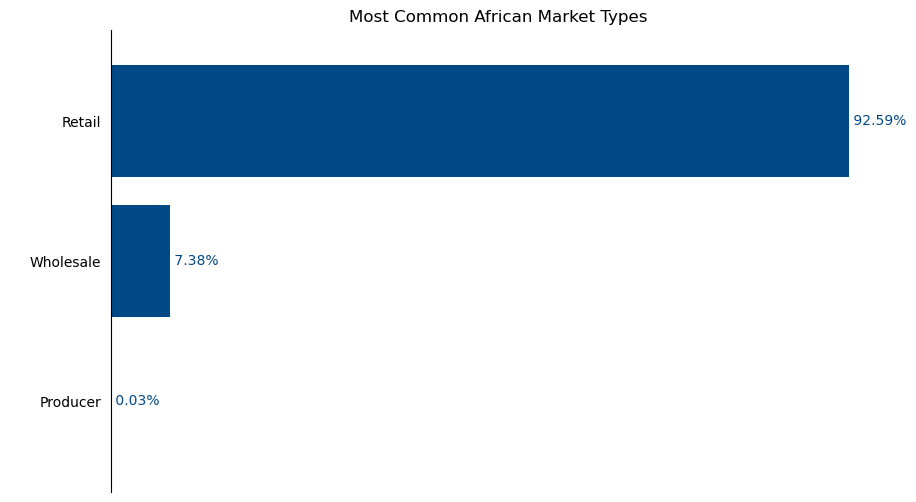

In [17]:
food_prices.pipe(lambda df: barh_plot(df, "market_type", ylabel=" ", title = "Most Common African Market Types", perc=True))

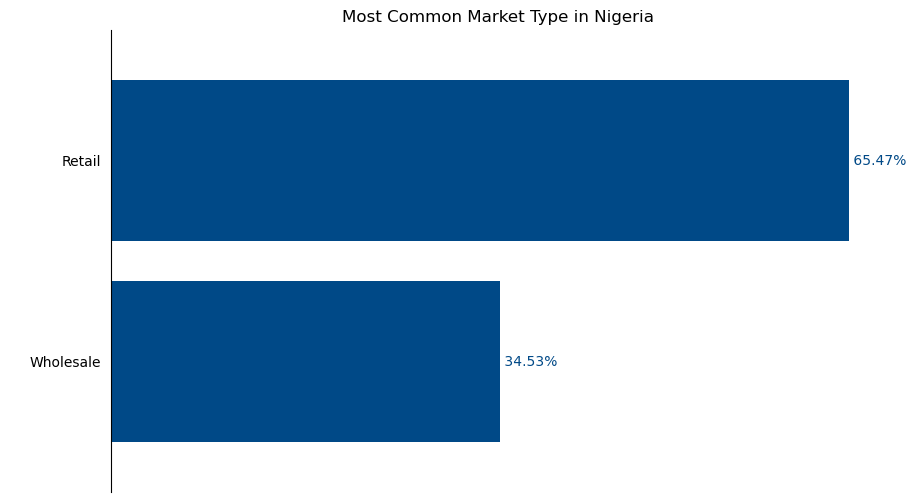

In [18]:
(food_prices
 .query("country.str.lower() == 'nigeria'")
 .pipe(lambda df: barh_plot(df, "market_type", ylabel=" ", title = "Most Common Market Type in Nigeria", perc=True))
)

The most common market type in Africa is the retail market accounting for 92.59% of the entire market. Wholesale accounted for 7.38% of the market and producer just 0.03%. The Nigerian market type in comparison is 65.47% retail and 34.53% wholesale but there is no producer market in Nigeria.

In [19]:
food_prices.query("market_type.str.lower() == 'producer'").country.value_counts()

country
Madagascar    248
Name: count, dtype: int64

Investigating the producer market in Africa shows that Madagascar is the only country that has a producer market.

## 2. What are The Most Common Produces in Each of These African Markets.

#### 2.1 Common Retail Market Produce

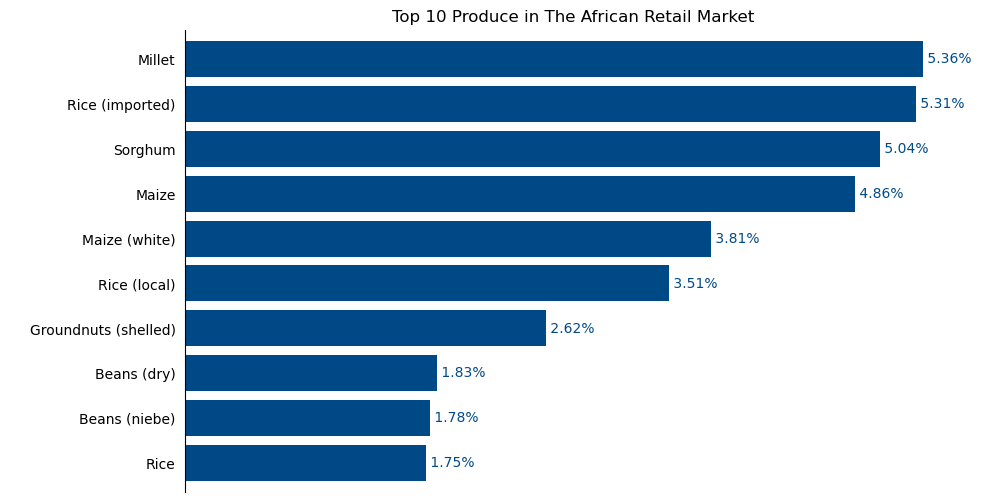

In [20]:
(food_prices
 .query("market_type.str.lower() == 'retail'")
 .assign(produce = lambda df: df.produce.str.replace("-", "").str.replace("Retail", "").str.strip())
 .pipe(lambda df: barh_plot(df, "produce", ylabel=" ", 
                            title = "Top 10 Produce in The African Retail Market",
                            perc=True, top_n=10))
)

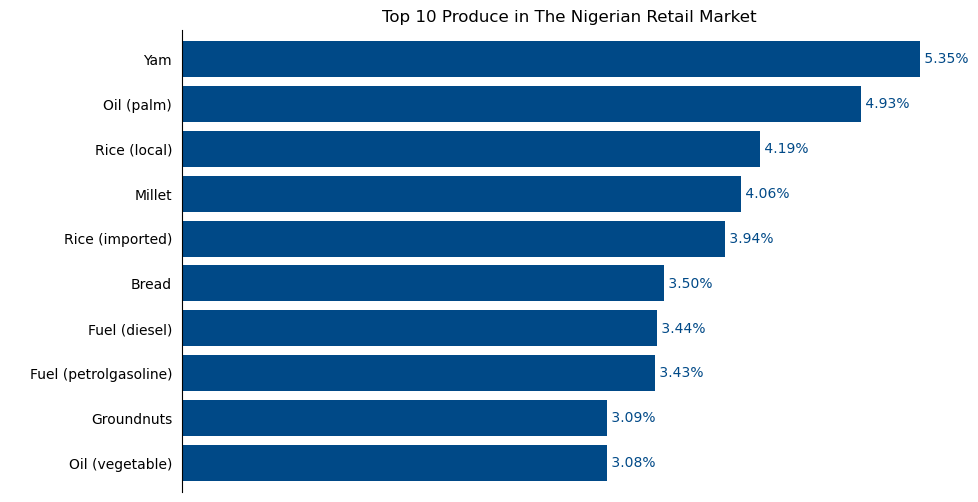

In [21]:
(food_prices
 .query("market_type.str.lower() == 'retail' & country == 'Nigeria'")
 .assign(produce = lambda df: df.produce.str.replace("-", "").str.replace("Retail", "").str.strip())
 .pipe(lambda df: barh_plot(df, "produce", ylabel=" ", 
                            title = "Top 10 Produce in The Nigerian Retail Market",
                            perc=True, top_n=10))
)

#### 2.2 Common Wholesale Market Produce

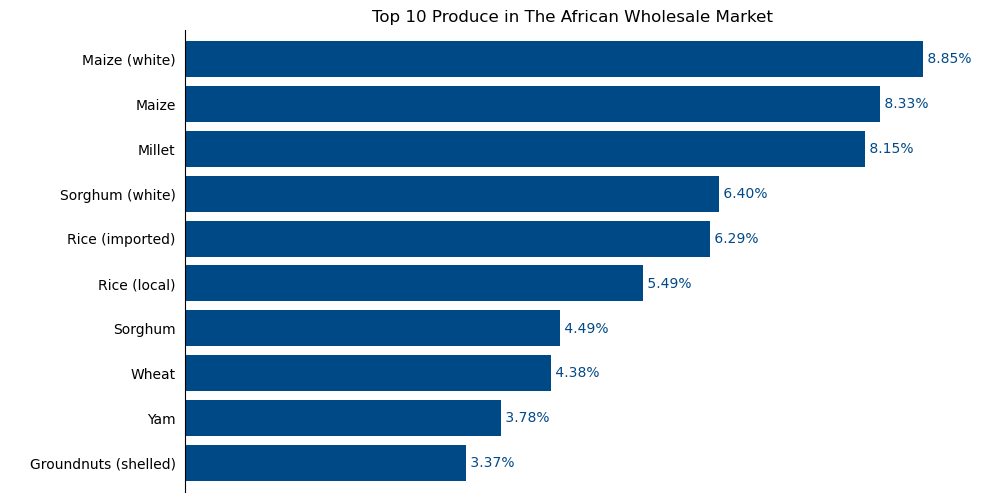

In [22]:
(food_prices
 .query("market_type.str.lower() == 'wholesale'")
 .assign(produce = lambda df: df.produce.str.replace("-", "").str.replace("Wholesale", "").str.strip())
 .pipe(lambda df: barh_plot(df, "produce", ylabel=" ", 
                            title = "Top 10 Produce in The African Wholesale Market",
                            perc=True, top_n=10))
)

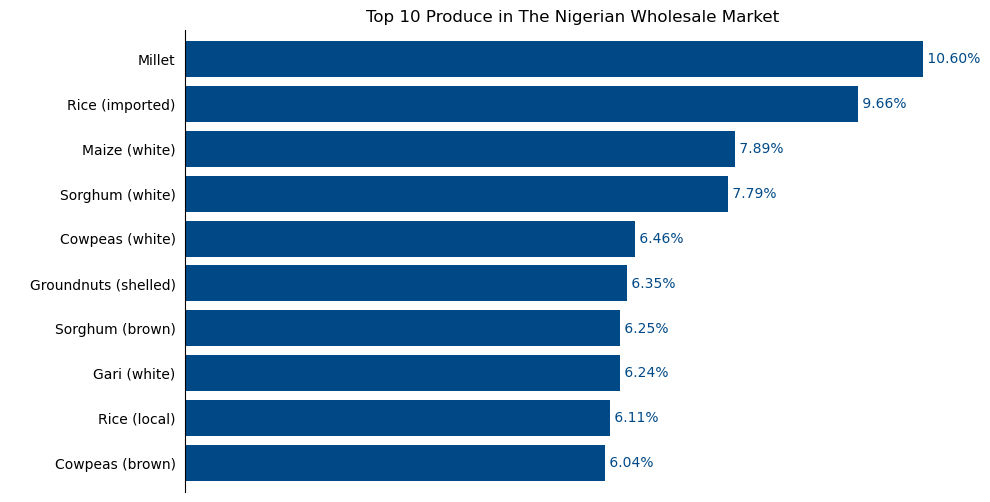

In [23]:
(food_prices
 .query("market_type.str.lower() == 'wholesale' & country == 'Nigeria'")
 .assign(produce = lambda df: df.produce.str.replace("-", "").str.replace("Wholesale", "").str.strip())
 .pipe(lambda df: barh_plot(df, "produce", ylabel=" ", 
                            title = "Top 10 Produce in The Nigerian Wholesale Market",
                            perc=True, top_n=10))
)

In [24]:
food_prices.query("market_type.str.lower() == 'producer'").produce.value_counts()

produce
Rice (paddy) - Producer    248
Name: count, dtype: int64

The only produce in the producer market is Rice (paddy) which is produced in Madagascar.

## 3. How has The Price Changed Overtime in Africa vs Nigeria

Since the prices for each country are in different currency, comparing the prices isn't very straight forward. The approach that has been taken to compare the prices is to normalise the price for each currency to be between the ranges of 1 and 10. 1 being the minimum value and 10 being the maximum value. This way there can be a like for like comparison of the prices in Nigeria vs the prices in Africa at Large.

To get a better picture we are going to look at the top Produces in Nigeria and compare their price change over a 5 year period in Nigeria and in Africa. 

In [25]:
scalers = {}
for country in food_prices.country.unique():
    scaler = MinMaxScaler()
    scaler.fit(food_prices.query(f"country == '{country}'")[["price"]])
    scalers[country] = scaler

In [26]:
def normalise_price(df: pd.DataFrame) -> pd.DataFrame:
    new_df = []
    for country in df.country.unique():
        new_df.append(
            df
            .query(f"country == '{country}'")
            .assign(normalise_price = lambda df: (scalers[country].transform(df[["price"]])))
        )
    return pd.concat(new_df)

In [27]:
food_prices.pipe(normalise_price).normalise_price.describe()

count    956779.000000
mean          0.048831
std           0.095029
min           0.000000
25%           0.001494
50%           0.010516
75%           0.050560
max           1.000000
Name: normalise_price, dtype: float64

The normalised price put the prices regardless of currency between a range of 1 and 10.

In [28]:
top_10_retail_produce_ngn = (food_prices
 .query("market_type.str.lower() == 'retail' & country == 'Nigeria'")
 .produce.value_counts()
 .head(10).index
)

retail_colors = {produce: color for produce, color in zip(top_10_retail_produce_ngn.str.replace("- Retail", "").str.strip(), 
                                                          sns.color_palette("bright") )
                }

top_10_wholesale_produce_ngn = (food_prices
 .query("market_type.str.lower() == 'wholesale' & country == 'Nigeria'")
 .produce.value_counts()
 .head(10).index
)

wholesale_colors = {produce: color for produce, color in zip(top_10_wholesale_produce_ngn.str.replace("- Wholesale", "").str.strip(), 
                                                          sns.color_palette("dark") )
                }

top_10_retail_produce = (food_prices
 .query("market_type.str.lower() == 'retail'")
 .produce.value_counts()
 .head(10).index
)

retail_colors_africa = {produce: color for produce, color in zip(top_10_retail_produce.str.replace("- Retail", "").str.strip(), 
                                                          sns.color_palette("bright") )
                }

top_10_wholesale_produce = (food_prices
 .query("market_type.str.lower() == 'wholesale'")
 .produce.value_counts()
 .head(10).index
)

wholesale_colors_africa = {produce: color for produce, color in zip(top_10_wholesale_produce.str.replace("- Wholesale", "").str.strip(), 
                                                          sns.color_palette("dark") )
                }


### Comparing Prices Between the Top 10 Nigerian Retail and Wholeslae Produces in Afirca vs Nigeria.

#### 3.1  Retail Market For Nigerian Produce (Nigeria vs Africa) 

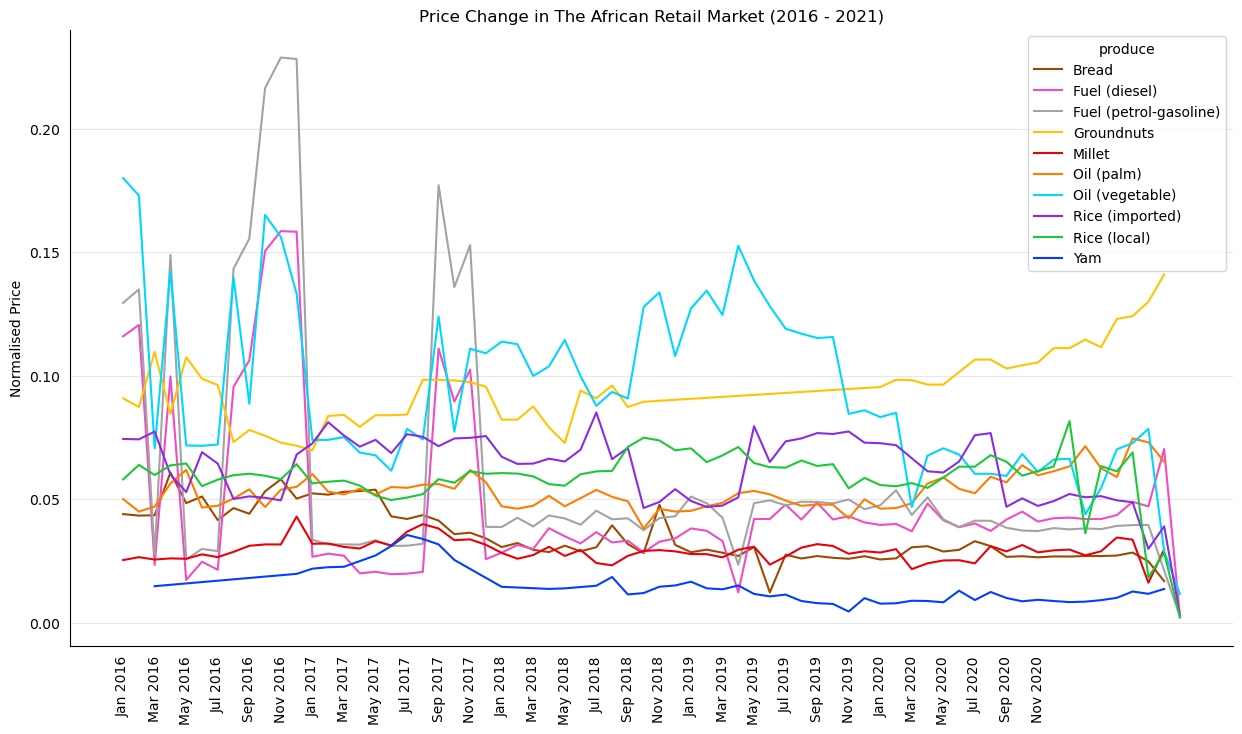

In [29]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.tick_params(bottom=0, left=0, top=0) 

spines = ["top", "right"]
for spine in spines:
    ax.spines[spine].set_visible(False)


ax.grid(axis="y", alpha=0.3)

ax.set_xticks(np.arange(0, 60, 2))

ax.tick_params(axis='x', rotation=90)
        

(food_prices.pipe(normalise_price)
 .query("market_type == 'Retail' & country != 'Nigeria'")
 .assign(date = food_prices.month_name + " " + food_prices.year.astype(str))
 .groupby(["date", "year", "month", "produce"]).agg({"normalise_price": "mean"})
 .reset_index()
 .sort_values(["year", "month"]).reset_index(drop=True)
 .query("year.between(2016, 2021)")
 .query(f"produce.isin({list(top_10_retail_produce_ngn)})")
 .assign(produce = lambda df: df.produce.str.replace("- Retail", "").str.strip())
 .pipe(lambda df: sns.lineplot(df, x="date", y="normalise_price", ax=ax, hue="produce", palette=retail_colors))
)

ax.set_xlabel("")
ax.set_ylabel("Normalised Price")
ax.set_title("Price Change in The African Retail Market (2016 - 2021)")

plt.show()

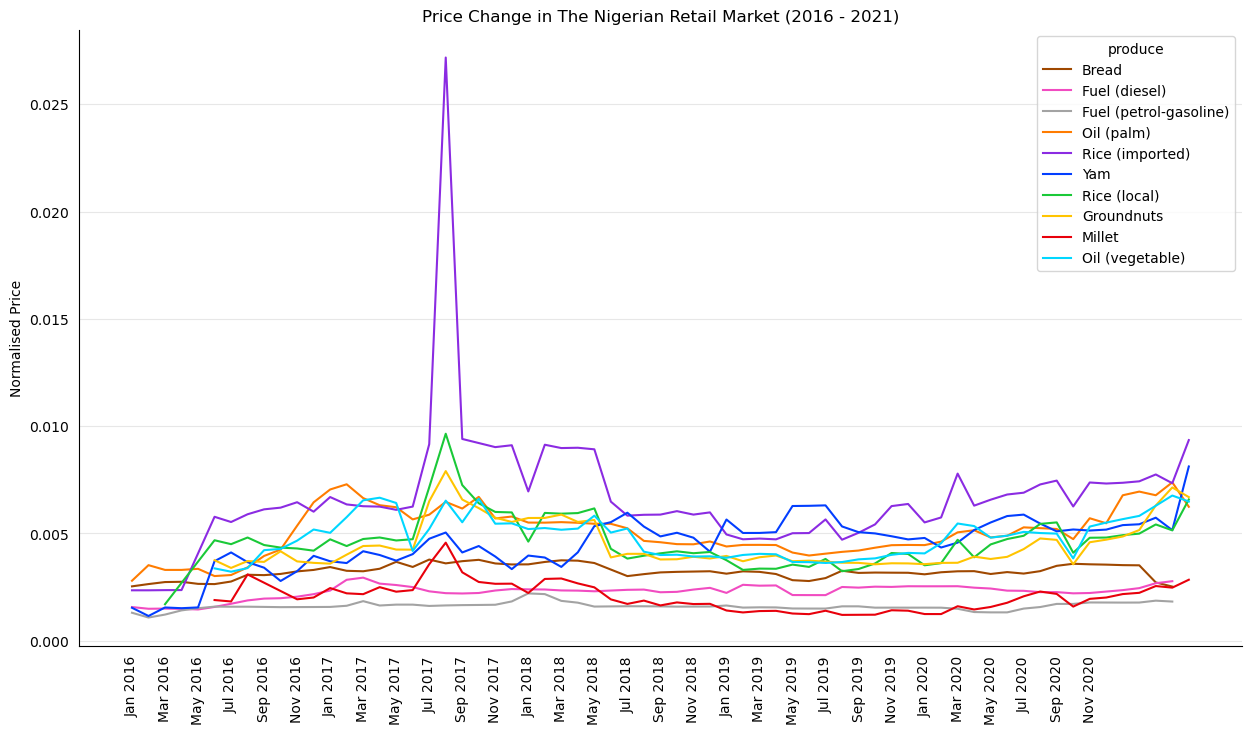

In [30]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.tick_params(bottom=0, left=0, top=0) 

spines = ["top", "right"]
for spine in spines:
    ax.spines[spine].set_visible(False)


ax.grid(axis="y", alpha=0.3)

ax.set_xticks(np.arange(0, 60, 2))

ax.tick_params(axis='x', rotation=90)
        

(food_prices.pipe(normalise_price)
 .query("currency == 'NGN' & market_type == 'Retail'")
 .assign(date = food_prices.month_name + " " + food_prices.year.astype(str))
 .groupby(["date", "year", "month", "produce"]).agg({"normalise_price": "mean"})
 .reset_index()
 .sort_values(["year", "month"]).reset_index(drop=True)
 .query("year.between(2016, 2021)")
 .query(f"produce.isin({list(top_10_retail_produce_ngn)})")
 .assign(produce = lambda df: df.produce.str.replace("- Retail", "").str.strip())
 .pipe(lambda df: sns.lineplot(df, x="date", y="normalise_price", ax=ax, hue="produce", palette=retail_colors))
)

ax.set_xlabel("")
ax.set_ylabel("Normalised Price")
ax.set_title("Price Change in The Nigerian Retail Market (2016 - 2021)")

plt.show()

Comparing the change in Prices for the top Nigerian produces in the Retail Market in Africa and that in Nigeria, we can infer the following:

1. The retail prices for these produces are very volatile and tend to fluctuate frequently.
2. The prices for these produces are relatively more expensive outside Nigeria than they are in Nigeria.
3. Overall, prices seem to be going down in 2021 outside Nigeria while they are increasing in Nigeria.
4. Prices in Nigeria seemed to have spiked pretty high somewhere between July 2017 to August 2017.

#### 3.2  Wholesale Market For Nigerian Produce (Nigeria vs Africa) 

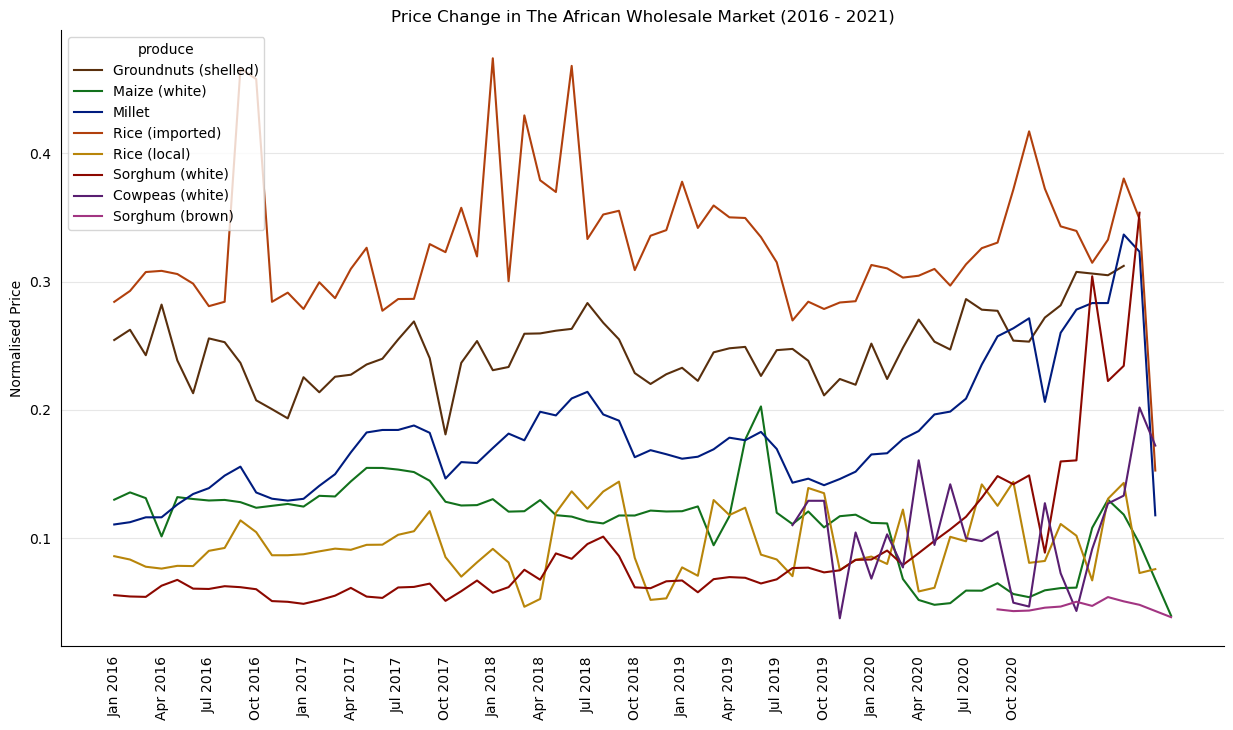

In [31]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.tick_params(bottom=0, left=0, top=0) 

spines = ["top", "right"]
for spine in spines:
    ax.spines[spine].set_visible(False)


ax.grid(axis="y", alpha=0.3)

ax.set_xticks(np.arange(0, 60, 3))

ax.tick_params(axis='x', rotation=90)


(food_prices.pipe(normalise_price)
 .query("market_type == 'Wholesale' & country != 'Nigeria'")
 .assign(date = food_prices.month_name + " " + food_prices.year.astype(str))
 .groupby(["date", "year", "month", "produce"]).agg({"normalise_price": "mean"})
 .reset_index()
 .sort_values(["year", "month"]).reset_index(drop=True)
 .query("year.between(2016, 2021)")
 .query(f"produce.isin({list(top_10_wholesale_produce_ngn)})")
 .assign(produce = lambda df: df.produce.str.replace("- Wholesale", "").str.strip())
 .pipe(lambda df: sns.lineplot(df, x="date", y="normalise_price", ax=ax, hue="produce", palette=wholesale_colors))
)

ax.set_xlabel("")
ax.set_ylabel("Normalised Price")
ax.set_title("Price Change in The African Wholesale Market (2016 - 2021)")

plt.show()

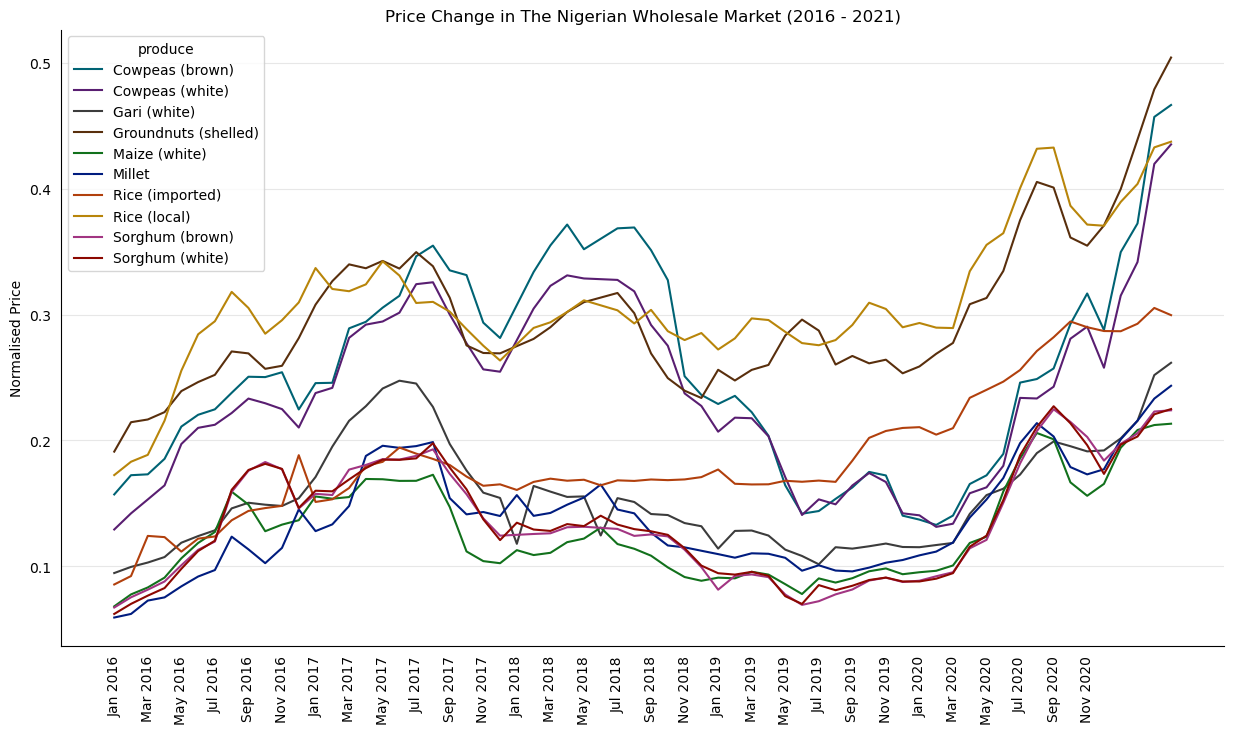

In [32]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.tick_params(bottom=0, left=0, top=0) 

spines = ["top", "right"]
for spine in spines:
    ax.spines[spine].set_visible(False)


ax.grid(axis="y", alpha=0.3)

ax.set_xticks(np.arange(0, 60, 2))

ax.tick_params(axis='x', rotation=90)


(food_prices.pipe(normalise_price)
 .query("currency == 'NGN' & market_type == 'Wholesale'")
 .assign(date = food_prices.month_name + " " + food_prices.year.astype(str))
 .groupby(["date", "year", "month", "produce"]).agg({"normalise_price": "mean"})
 .reset_index()
 .sort_values(["year", "month"]).reset_index(drop=True)
 .query("year.between(2016, 2021)")
 .query(f"produce.isin({list(top_10_wholesale_produce_ngn)})")
 .assign(produce = lambda df: df.produce.str.replace("- Wholesale", "").str.strip())
 .pipe(lambda df: sns.lineplot(df, x="date", y="normalise_price", ax=ax, hue="produce", palette=wholesale_colors))
)

ax.set_xlabel("")
ax.set_ylabel("Normalised Price")
ax.set_title("Price Change in The Nigerian Wholesale Market (2016 - 2021)")

plt.show()

* The wholesale market for the top Nigerian produces showed the same volatility as with the retail market earlier.
* Prices in the African wholesale market for these produces went down in price after 2020 while they increased in price in the Nigerian wholesale market.
* The wholesale market in Nigeria for these produces looked to be cyclic in nature.

## 4. Comparing Price of Rice and Fuel in the Nigerian and African Market.

Fuel and Rice are two of the most important commodity in Nigeria. Rice is a staple in the Nigerian diet and Nigerians rely on Fuel to not only power their cars but to generate electricity for their homes and businesses.

#### 4.1 Petrol Prices Nigeria vs Africa

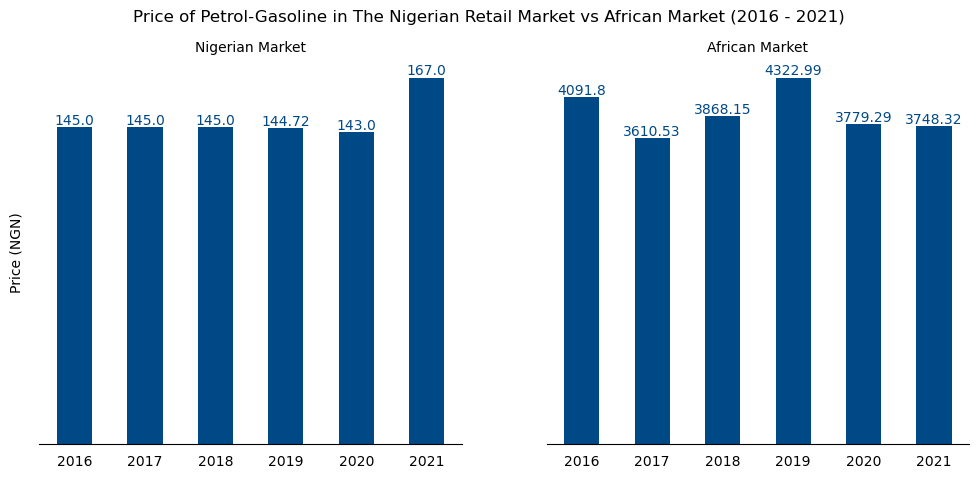

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

for ax in (ax1, ax2):
    spines = ["top", "right", "left"]
    for spine in spines:
        ax.spines[spine].set_visible(False)
    ax.tick_params(bottom=0, left=0)


(food_prices.pipe(normalise_price)
 .query("currency == 'NGN' & market_type == 'Retail'")
 .assign(date = food_prices.month_name + " " + food_prices.year.astype(str))
 .groupby(["year", "produce"]).agg({"normalise_price": "median"})
 .reset_index()
 .sort_values(["year"]).reset_index(drop=True)
 .query("year.between(2016, 2021)")
 .query("produce.str.lower().str.contains('petrol')")
 .assign(produce = lambda df: df.produce.str.replace("- Retail", "").str.strip())
 .plot.bar(x="year", y="normalise_price", ax=ax1, legend=False, rot=360, color="#004987")
)

(food_prices.pipe(normalise_price)
 .query("currency != 'NGN' & market_type == 'Retail'")
 .assign(date = food_prices.month_name + " " + food_prices.year.astype(str))
 .groupby(["year", "produce"]).agg({"normalise_price": "median"})
 .reset_index()
 .sort_values(["year"]).reset_index(drop=True)
 .query("year.between(2016, 2021)")
 .query("produce.str.lower().str.contains('petrol-gasoline') & ~produce.str.lower().str.contains('parallel')")
 .assign(produce = lambda df: df.produce.str.replace("- Retail", "").str.strip())
 .plot.bar(x="year", y="normalise_price", ax=ax2, legend=False, rot=360, color="#004987")
)
ax1.bar_label(ax1.containers[0], 
              labels = scalers["Nigeria"].inverse_transform([ax1.containers[0].datavalues]).reshape(-1).round(2),
              color="#004987")
ax2.bar_label(ax2.containers[0], 
              labels = scalers["Nigeria"].inverse_transform([ax2.containers[0].datavalues]).reshape(-1).round(2),
              color="#004987")

ax1.set_ylabel("Price (NGN)")

plt.suptitle("Price of Petrol-Gasoline in The Nigerian Retail Market vs African Market (2016 - 2021)")
for ax, title in zip((ax1, ax2), ("Nigerian Market", "African Market")):
    ax.set_yticks(np.arange(1),labels = [])
    ax.set_title(title, size=10)
    ax.set_xlabel("")
    
    
    
plt.show()

* Comparing the price of petrol in the Nigerian retail market vs the rest of Africa, we can see that the price of petrol in Nigeria is significantly lower than that of the rest of the contitent.

* While this shows that the cost of petrol in Nigeria is significantly lower, it doesn't mean that Nigeria has the cheapest petrol price. Because we have taken the median of the prices for the years we looked at. However, it does signify that the Nigerian market has one of the lowest prices for petrol since the price is significantly below the median.

* Overall petrol prices in the African market seems to have dropped between 2016 to 2021 while that in the Nigerian market increased.

#### 4.2 Rice Prices Nigeria vs Africa

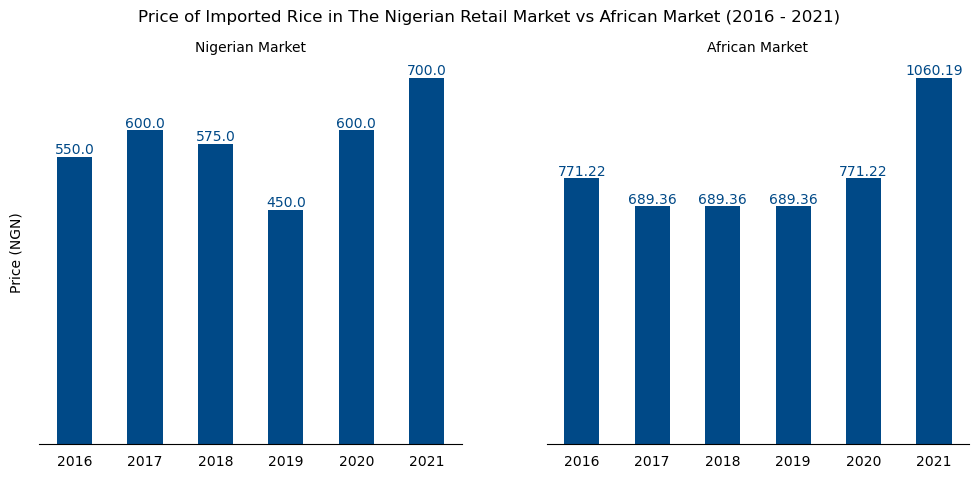

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

for ax in (ax1, ax2):
    spines = ["top", "right", "left"]
    for spine in spines:
        ax.spines[spine].set_visible(False)
    ax.tick_params(bottom=0, left=0)


(food_prices.pipe(normalise_price)
 .query("currency == 'NGN' & market_type == 'Retail'")
 .assign(date = food_prices.month_name + " " + food_prices.year.astype(str))
 .groupby(["year", "produce"]).agg({"normalise_price": "median"})
 .reset_index()
 .sort_values(["year"]).reset_index(drop=True)
 .query("year.between(2016, 2021)")
 .query("produce.str.lower().str.contains('rice') & produce.str.lower().str.contains('imported')")
 .assign(produce = lambda df: df.produce.str.replace("- Retail", "").str.strip())
 .plot.bar(x="year", y="normalise_price", ax=ax1, legend=False, rot=360, color="#004987")
)

(food_prices.pipe(normalise_price)
 .query("currency != 'NGN' & market_type == 'Retail'")
 .assign(date = food_prices.month_name + " " + food_prices.year.astype(str))
 .groupby(["year", "produce"]).agg({"normalise_price": "median"})
 .reset_index()
 .sort_values(["year"]).reset_index(drop=True)
 .query("year.between(2016, 2021)")
 .query("produce.str.lower().str.contains('rice') & produce.str.lower().str.contains('(imported)', regex=False)")
 .assign(produce = lambda df: df.produce.str.replace("- Retail", "").str.strip())
 .plot.bar(x="year", y="normalise_price", ax=ax2, legend=False, rot=360, color="#004987")
)
ax1.bar_label(ax1.containers[0],
              labels = scalers["Nigeria"].inverse_transform([ax1.containers[0].datavalues]).reshape(-1).round(2),
              color="#004987")
ax2.bar_label(ax2.containers[0],
              labels = scalers["Nigeria"].inverse_transform([ax2.containers[0].datavalues]).reshape(-1).round(2),
              color="#004987")

ax1.set_ylabel("Price (NGN)")

plt.suptitle("Price of Imported Rice in The Nigerian Retail Market vs African Market (2016 - 2021)")
for ax, title in zip((ax1, ax2), ("Nigerian Market", "African Market")):
    ax.set_yticks(np.arange(1),labels = [])
    ax.set_title(title, size=10)
    ax.set_xlabel("")
    
    
    
plt.show()

* The price for a KG of Rice in the African market is slightly higher than that in the Nigerian market but the difference is not as significant as with the price of Petrol.

* The Price of rice increased in both Markets in 2021

## 5. How Does The Price of Petrol and Rice Differ in Different Nigerian States.

#### 5.1 Difference in Petrol prices

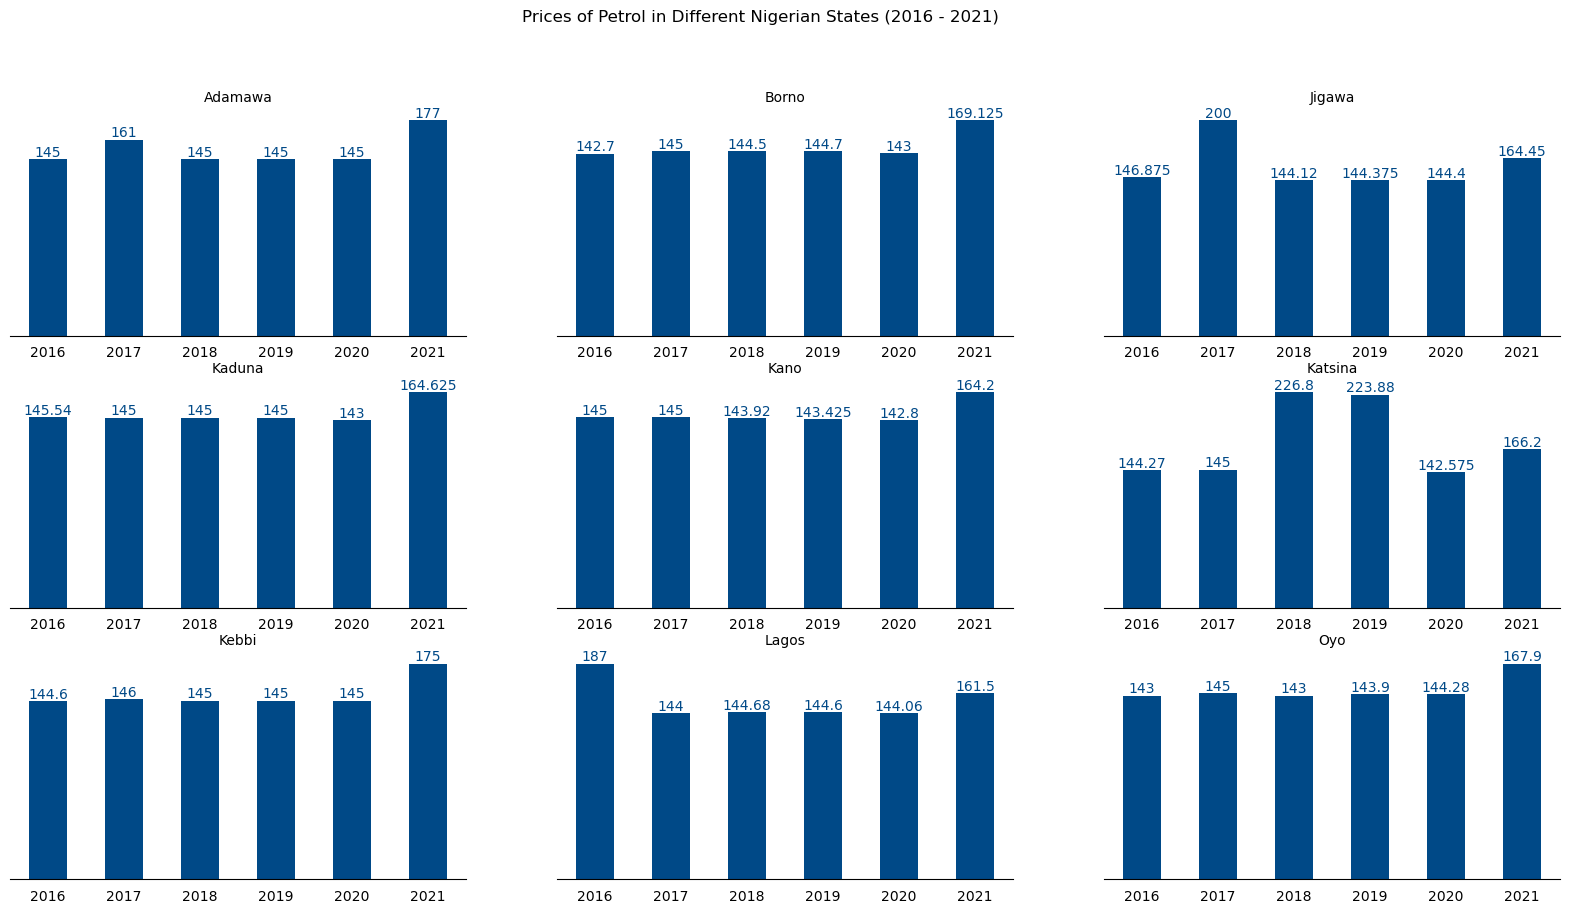

In [35]:
states = food_prices.query("country == 'Nigeria'").state.unique()
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
plt.suptitle("Prices of Petrol in Different Nigerian States (2016 - 2021)")

for state, ax in zip(states, axs.flat):
    (food_prices.pipe(normalise_price)
     .query(f"currency == 'NGN' & market_type == 'Retail' & produce.str.lower().str.contains('petrol') & state == '{state}'")
     .groupby(["year"]).agg({"price": "median"})
     .reset_index()
     .query("year.between(2016, 2021)")
     .plot.bar(x="year", y="price", ax=ax, legend=False, color="#004987", rot=360)
     #.plot(kind='bar', stacked=True)#.bar(x="year", y="price", legend=False, rot=360, color="#004987")
    )
    spines = ["top", "right", "left"]
    for spine in spines:
        ax.spines[spine].set_visible(False)
    ax.tick_params(bottom=0, left=0)
    ax.set_yticks([])
    ax.set_title(state, size=10)
    ax.set_xlabel("")
    ax.bar_label(ax.containers[0], color="#004987")


Prices for Petrol are relatively the same accross the various states. But in certain years, the prices in some states are significaantly higher than the rest. E.g Lagos in 2016, Jigawa in 2017, Katsina in 2018 and 2019.

#### 5.2 Difference in Rice Prices

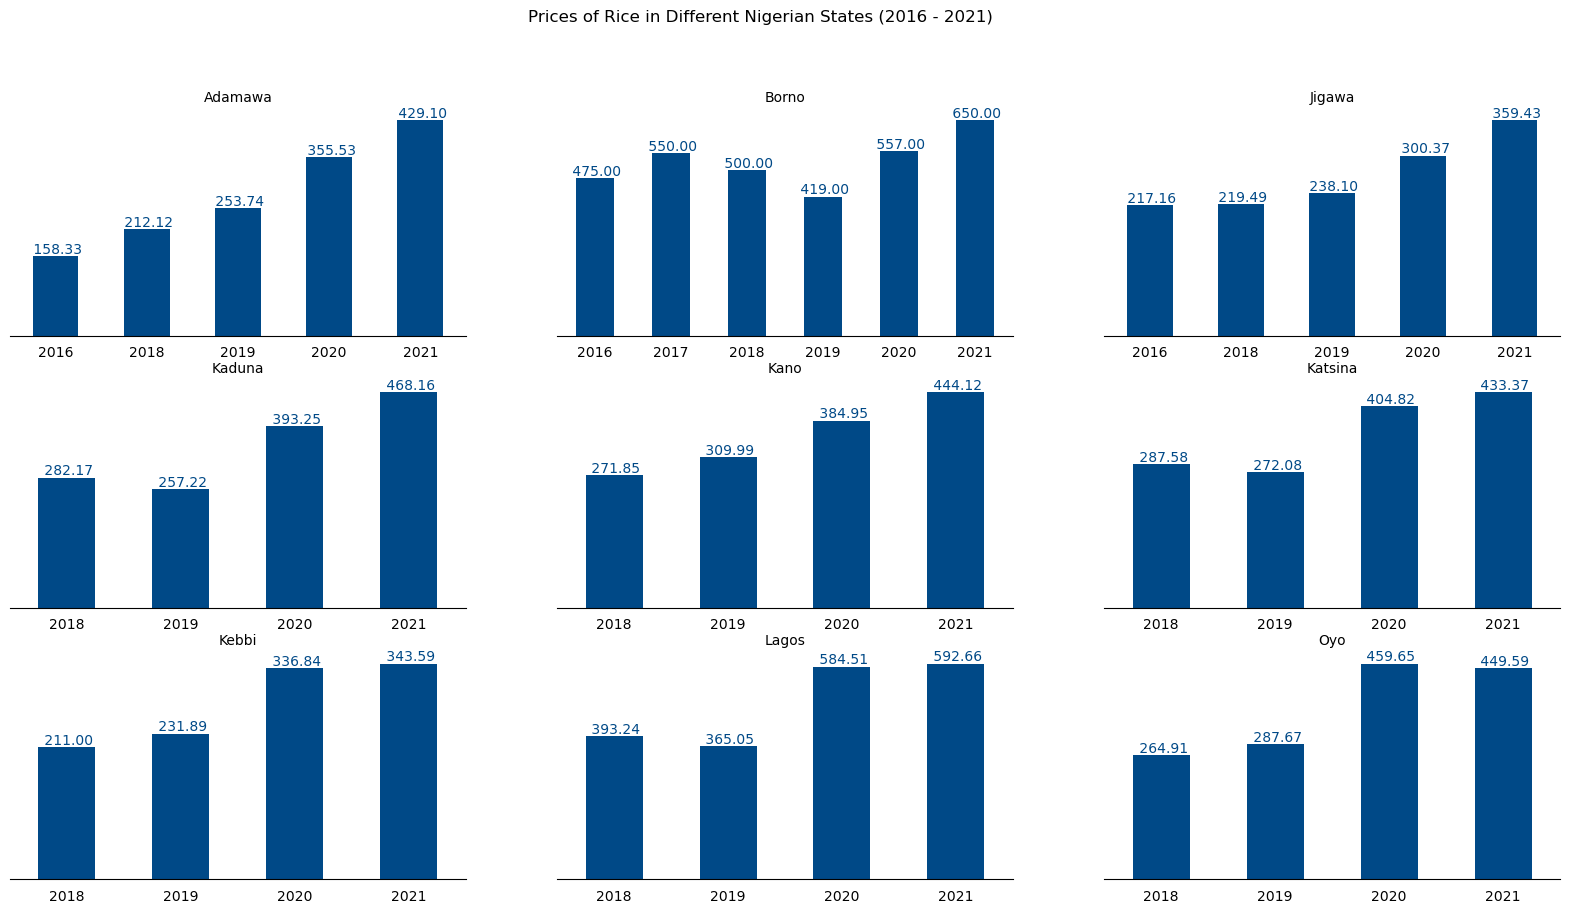

In [36]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
plt.suptitle("Prices of Rice in Different Nigerian States (2016 - 2021)")

for state, ax in zip(states, axs.flat):
    (food_prices.pipe(normalise_price)
     .query(f"currency == 'NGN' & market_type == 'Retail' & produce.str.lower().str.contains('rice') & state == '{state}'")
     .groupby(["year"]).agg({"price": "median"})
     .reset_index()
     .query("year.between(2016, 2021)")
     .plot.bar(x="year", y="price", ax=ax, legend=False, color="#004987", rot=360)
     #.plot(kind='bar', stacked=True)#.bar(x="year", y="price", legend=False, rot=360, color="#004987")
    )
    spines = ["top", "right", "left"]
    for spine in spines:
        ax.spines[spine].set_visible(False)
    ax.tick_params(bottom=0, left=0)
    ax.set_yticks([])
    ax.set_title(state, size=10)
    ax.set_xlabel("")
    ax.bar_label(ax.containers[0], color="#004987", fmt=" {:,.2f}")


Outside of Lagos, Borno state had the highest price for a KG of rice. Infact the price of a KG of rice in Borno in 2021 was significantly higher than the price of rice in other states.

## Conclusion

The goal was to answer questions on the African market in comparison to the Nigerian one. We were concerned in knowing what market types dominated the scene, what products can we find in those markets, how their prices have changed, etc.
From the above analysis we discovered the following.

* The retail market had the biggest market share accounting for over 90% of the African market and 65% of the Nigerian one. The produce market was found only in Madagascar.
* Yam, oil, rice, fuel, and bread were some of the biggest products in the retail market for Nigeria.
* Food prices in Nigeria were lower than that in the continent but the prices seemed to be increasing while the prices in the continent were reducing.
* Nigerians pay lower for petrol than elsewhere. While the normalised price was a good way to compare prices between Nigeria and the continent, it doesn't account for how inflation has affected these prices but still, it was a valid method to compare the prices.